# CUSTOMER CHURN ANALYSIS

In [ ]:
Importing the Necessary Libraries
Classification Problem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

In [2]:
## Importing the dataset
df = pd.read_csv("C:\\Users\\annuy\\Desktop\\Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Preview dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Shape of dataset
df.shape

(7043, 21)

In [5]:
## Check the columns
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
## Checking the datatype of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
## Checking the descriptive statistics of numerica values
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.isnull().sum()

# There is no missing value present in Churn Dataset.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

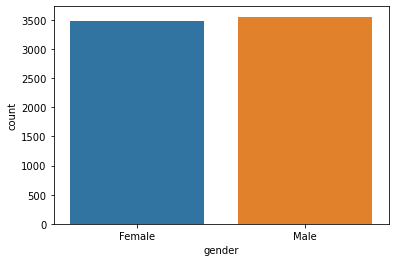

In [9]:
sns.countplot(df["gender"])
 
# The graph shows that there are almost equal number of male and female customers present in the Dataset


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

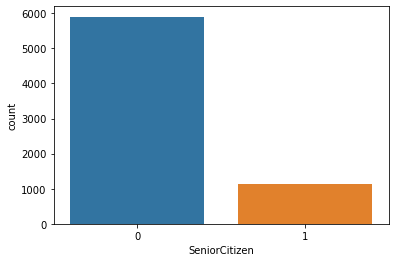

In [10]:
sns.countplot(df["SeniorCitizen"])

# The Graph shows that very few customers in the Dataset are Senior Citizens


<AxesSubplot:xlabel='Partner', ylabel='count'>

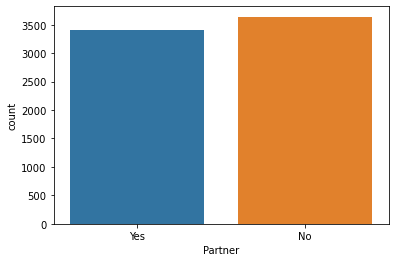

In [11]:
sns.countplot(df["Partner"])

# The graph shows that there are almost equal number of people with and without life partners

<AxesSubplot:xlabel='Dependents', ylabel='count'>

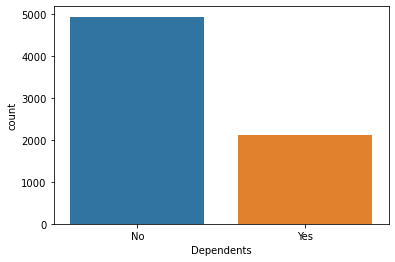

In [12]:
sns.countplot(df["Dependents"])

# The graph shows that most customers in the Dataset do not have any dependents while few customers have dependents

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

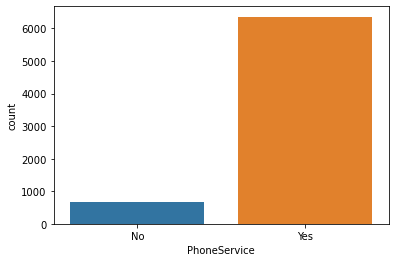

In [13]:
sns.countplot(df["PhoneService"])

# The Graph shows most customers have Phonme services while very few customers do not take phone services


<AxesSubplot:xlabel='InternetService', ylabel='count'>

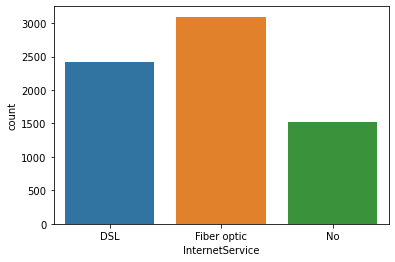

In [14]:
sns.countplot(df["InternetService"])

# The Graph shows that most customers have fiber optic internet service while few customers do not take internet services 

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

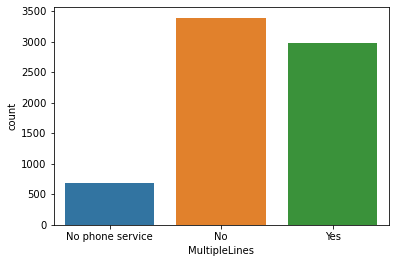

In [15]:
sns.countplot(df["MultipleLines"])

# The Graph shows that some customers with phone servies have opted for multiple lines 

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

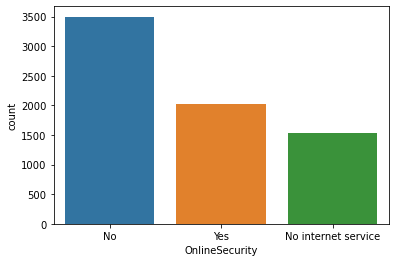

In [16]:
sns.countplot(df["OnlineSecurity"])

# The Graph shows that few customers who have opted for internet services have also opted for online security services


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

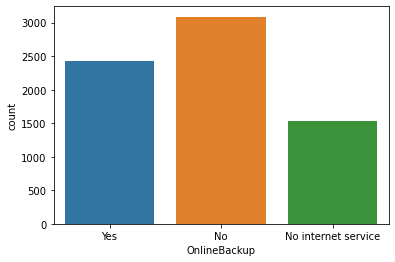

In [17]:
sns.countplot(df["OnlineBackup"])

# The Graph shows that few customers who have opted for internet services have also opted for online backup services

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

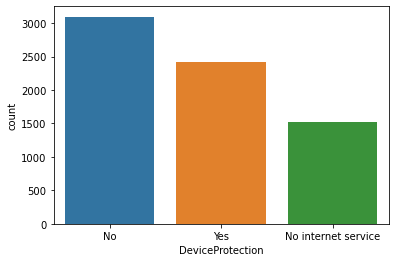

In [18]:
sns.countplot(df["DeviceProtection"])

# The Graph shows that some customers who have opted for internet services have also opted for device protection services


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

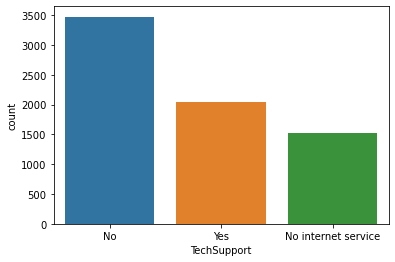

In [19]:
sns.countplot(df["TechSupport"])

# The Graph shows that very few customers who have opted for internet services have also opted for tech support services

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

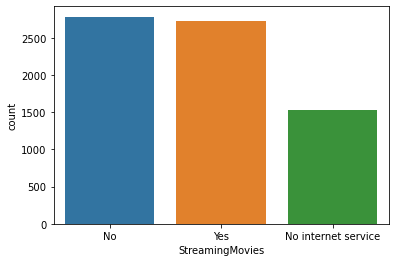

In [20]:
sns.countplot(df["StreamingMovies"])

# The Graph shows that mostly equal number of customers are there who have and who have not opted for Movie Stream Services


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

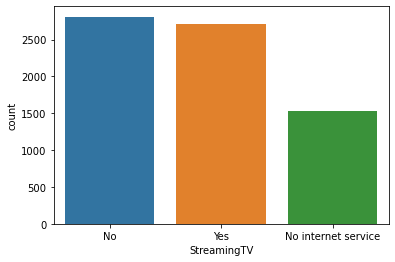

In [21]:
sns.countplot(df["StreamingTV"])

# The Graph shows that mostly equal number of customers are there who have and who have not opted for TV Stream Services


<AxesSubplot:xlabel='Contract', ylabel='count'>

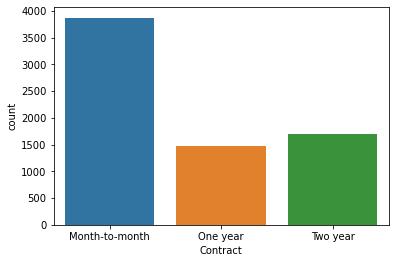

In [22]:
sns.countplot(df["Contract"])

# The Graph shows that mostly Customers prefer Month to Month payment contracts 
# While few cutomers prefer for long term payment contracts of 1 and 2 years


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

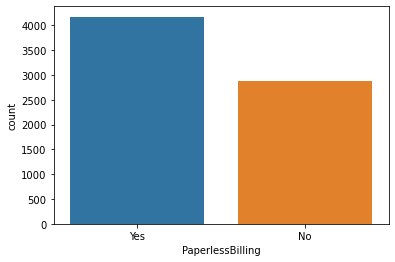

In [23]:
sns.countplot(df["PaperlessBilling"])

# The Graph shows that most customers have opted for paperless billing system


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

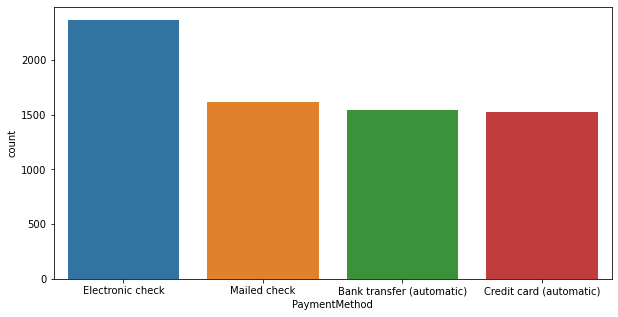

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df["PaymentMethod"])

# The Graph shows that most customers prefer to keep their payment mode as Electronic Check

<AxesSubplot:xlabel='Churn', ylabel='count'>

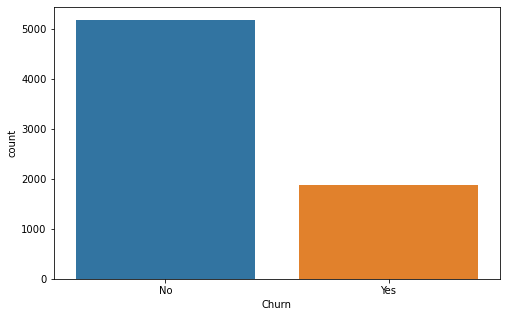

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(df["Churn"])

# The Graph shows that around 40% of customers leave the company services and therefore shows the high churn rate


<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

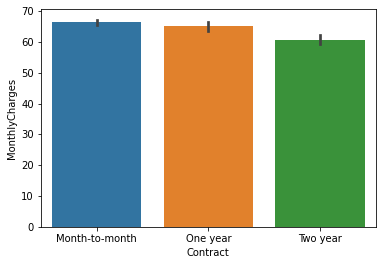

In [26]:
sns.barplot(x=df["Contract"], y=df["MonthlyCharges"])

# The Graph shows that monthly charges are little high in month to month and slighly low in year and 2 year contract
# It is because long term contract cost little less so that more people gets encouraged to opt for longer contract plans


<AxesSubplot:xlabel='Contract', ylabel='tenure'>

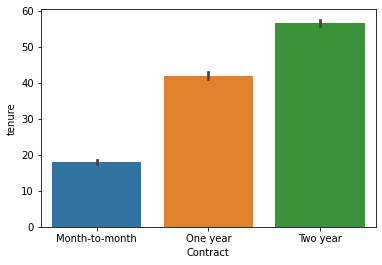

In [27]:
sns.barplot(x=df["Contract"], y=df["tenure"])

# It shows for how much tenure the customers do which kind of contract with the company


<AxesSubplot:xlabel='Contract', ylabel='count'>

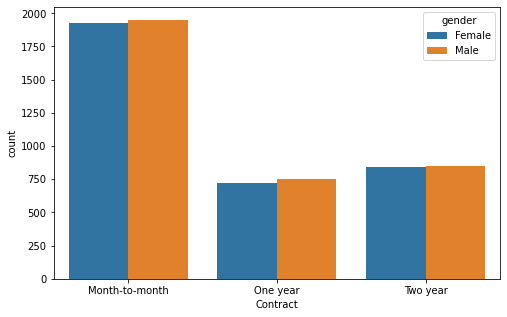

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(df["Contract"], hue=df["gender"])

# It shows that there are almost equal number of male and female customers doing same kind of contracts with the company

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

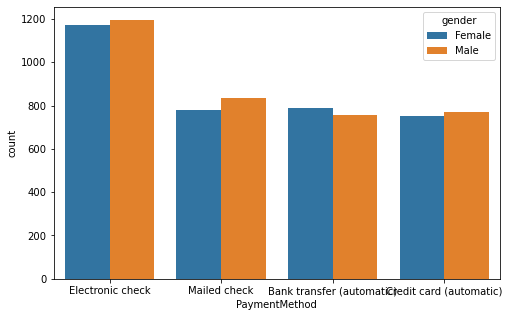

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(df["PaymentMethod"], hue=df["gender"])

# It shows that there are almost equal number of male and female customers using same kind of payment methods


In [30]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [31]:
df.drop(columns=["customerID"],inplace=True)

# Dropping the Customer ID as it is not relevent for the Model Training


In [33]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Importing the Label Encoder from Sklearn Library

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
        
# Running a for loop to give numeric values to strings using the Label Encoder in churn dataset

In [37]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [38]:
df_corr=df.corr()
df_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


<AxesSubplot:>

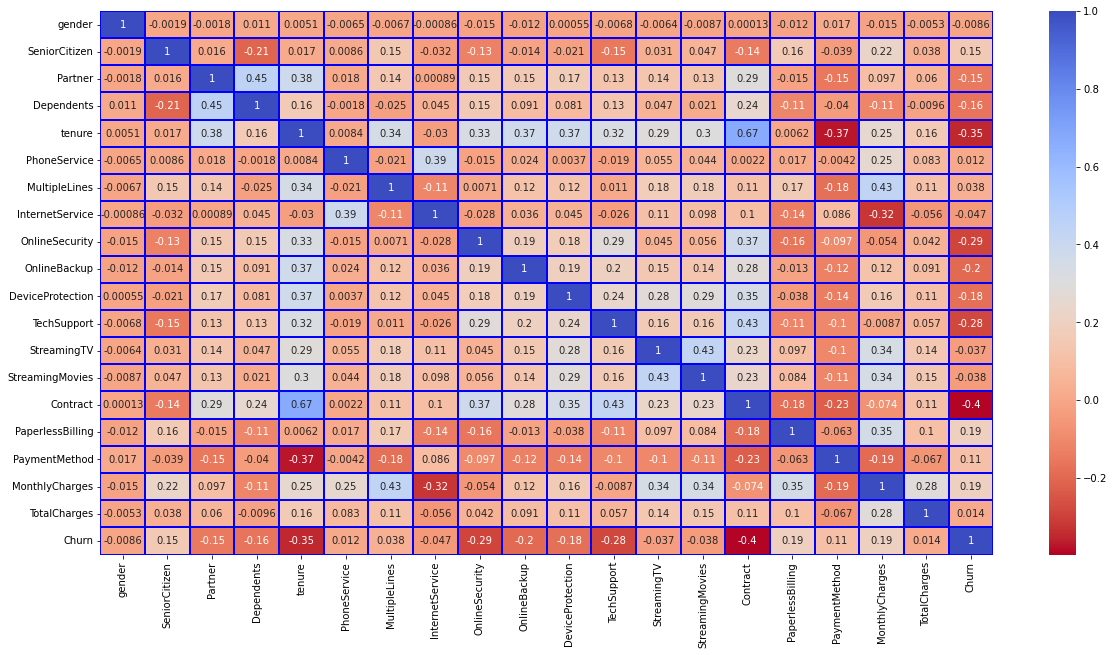

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot=True, linecolor="blue", linewidths=2, cmap="coolwarm_r")

In [40]:
x=df.iloc[:,0:-1]
x

# Taking all the Independent variables in x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [41]:
y=df.iloc[:,-1]
y

# Taking the target variable in y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

# Splitting the Dataset into Train & Test

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [43]:
# Finding the best accuracy with best random state

MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr_train=lr.predict(x_train)
    predlr_test=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.8205565019875071 on Random State  240


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=463)

In [45]:
# Training the Logistic Regression Model


lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
# The Logistic Regression Model is predicting values based on training

lr_pred=lr.predict(x_test)
lr_pred

array([0, 0, 0, ..., 1, 0, 0])

In [46]:
# The Accuracy Score & Evolution Matrix of Logistic Regression Model

print(accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

0.8188529244747302
[[1173  145]
 [ 174  269]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1318
           1       0.65      0.61      0.63       443

    accuracy                           0.82      1761
   macro avg       0.76      0.75      0.75      1761
weighted avg       0.82      0.82      0.82      1761



# Model Building using other Classifiers:-

In [47]:
# Importing the Decision Tree Classifier Model

from sklearn.tree import DecisionTreeClassifier

In [48]:
# Finding the best accuracy with best random state

MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc_train=dtc.predict(x_train)
    preddtc_test=dtc.predict(x_test)
    acc=accuracy_score(y_test,preddtc_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.760931289040318 on Random State  73


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=73)

In [50]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

# Training the Decision Tree Classifier Model

DecisionTreeClassifier()

In [51]:
# The Decision Tree Classifier Model is predicting the values based on training

dtc_pred=dtc.predict(x_test)
dtc_pred

array([1, 0, 0, ..., 1, 0, 0])

In [52]:
# The Accuracy Score and Evolution Matrix of Decision Tree Classifier Model

print(accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

0.7592277115275412
[[1104  228]
 [ 196  233]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1332
           1       0.51      0.54      0.52       429

    accuracy                           0.76      1761
   macro avg       0.68      0.69      0.68      1761
weighted avg       0.77      0.76      0.76      1761



# Random Forest Classifier:-

In [53]:
# Importing Random Forest Classifier Model


from sklearn.ensemble import RandomForestClassifier


In [54]:
# Finding the best accuracy with best random state


MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    predrfc_train=rfc.predict(x_train)
    predrfc_test=rfc.predict(x_test)
    acc=accuracy_score(y_test,predrfc_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.8137421919363997 on Random State  106


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=481)

In [56]:
# Training the Random Forest Classifier Model

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
# The Random Forest Classifier Model is predicting values based on training

rfc_pred=rfc.predict(x_test)
rfc_pred

array([1, 0, 0, ..., 0, 0, 0])

In [58]:
# The Accuracy Score and Evolution Matrix of Random Forest Classifier Model


print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

0.8086314593980692
[[1194  123]
 [ 214  230]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1317
           1       0.65      0.52      0.58       444

    accuracy                           0.81      1761
   macro avg       0.75      0.71      0.73      1761
weighted avg       0.80      0.81      0.80      1761



# Adaboost Classifier:-

In [59]:
# Importing the AdaBoostClassifier Model

from sklearn.ensemble import AdaBoostClassifier

In [60]:
# Finding the best accuracy with best random state

MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    adb=AdaBoostClassifier()
    adb.fit(x_train,y_train)
    predadb_train=adb.predict(x_train)
    predadb_test=adb.predict(x_test)
    acc=accuracy_score(y_test,predadb_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.825099375354912 on Random State  341


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [62]:
# Training the AdaBoostClassifier Model

adb=AdaBoostClassifier()
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [63]:
AdaBoostClassifier()

AdaBoostClassifier()

In [64]:
# The AdaBoostClassifier Model is predicting values based on training

adb_pred=adb.predict(x_test)
adb_pred

array([0, 0, 0, ..., 0, 1, 0])

In [65]:
# The Accuracy Score and Evolution Matrix of AdaBoostClassifier Model

print(accuracy_score(y_test,adb_pred))
print(confusion_matrix(y_test,adb_pred))
print(classification_report(y_test,adb_pred))

0.8160136286201022
[[1173  140]
 [ 184  264]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1313
           1       0.65      0.59      0.62       448

    accuracy                           0.82      1761
   macro avg       0.76      0.74      0.75      1761
weighted avg       0.81      0.82      0.81      1761



# K Neighbors Classifier:-

In [66]:
# Importing the K Neighbors Classifier Model

from sklearn.neighbors import KNeighborsClassifier

In [67]:
# Finding the best accuracy with best random state

MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    predknn_train=knn.predict(x_train)
    predknn_test=knn.predict(x_test)
    acc=accuracy_score(y_test,predknn_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.7836456558773425 on Random State  106


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=341)

In [70]:
# Training the K Neighbors Classifier Model

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [71]:
# The K Neighbors Classifier Model is predicting values based on training

knn_pred=knn.predict(x_test)
knn_pred

array([0, 0, 1, ..., 0, 1, 0])

In [72]:
# The Accuracy Score and Evolution Matrix of K Neighbors Classifier Model

print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.7688813174332766
[[1170  152]
 [ 255  184]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1322
           1       0.55      0.42      0.47       439

    accuracy                           0.77      1761
   macro avg       0.68      0.65      0.66      1761
weighted avg       0.75      0.77      0.76      1761



# Cross Validation:-

In [73]:
# Importing the Cross Validation Score


from sklearn.model_selection import cross_val_score

In [74]:
scr1=cross_val_score(lr, x, y, cv=5)
scr1

array([0.80269695, 0.79843861, 0.78850248, 0.80255682, 0.80184659])

In [75]:
# The Cross Validation Score of Logistic Regression is : 0.798808

print("The Cross Validation Score of Logistic Regression is :", scr1.mean())

The Cross Validation Score of Logistic Regression is : 0.7988082900509711


In [76]:
scr2=cross_val_score(dtc, x, y, cv=5)
scr2

array([0.73953158, 0.7310149 , 0.72746629, 0.70951705, 0.734375  ])

In [77]:
# The Cross Validation Score of Decision Tree Classifier is : 0.7221

print("The Cross Validation Score of Decision Tree Classifier is :", scr2.mean())

The Cross Validation Score of Decision Tree Classifier is : 0.7283809640944577


In [78]:
scr3=cross_val_score(rfc, x, y, cv=5)
scr3

array([0.79914833, 0.79985806, 0.77430802, 0.79474432, 0.79119318])

In [79]:
# The Cross Validation Score of Random Forest Classifier is : 0.7934113

print("The Cross Validation Score of Random Forest Classifier is :", scr3.mean())


The Cross Validation Score of Random Forest Classifier is : 0.7918503814762243


In [80]:
scr4=cross_val_score(adb, x, y, cv=5)
scr4

array([0.8105039 , 0.80269695, 0.7920511 , 0.80539773, 0.80184659])

In [81]:
# The Cross Validation Score of AdaBoost Classifier is : 0.80249925

print("The Cross Validation Score of AdaBoost Classifier is :", scr4.mean())

The Cross Validation Score of AdaBoost Classifier is : 0.802499253984128


In [82]:
scr5=cross_val_score(knn, x, y, cv=5)
scr5

array([0.7430802 , 0.7523066 , 0.74946771, 0.734375  , 0.75710227])

In [83]:
# The Cross Validation Score of K Neighbors Classifier is : 0.747266

print("The Cross Validation Score of K Neighbors Classifier is :", scr5.mean())

The Cross Validation Score of K Neighbors Classifier is : 0.7472663558939286


# Hyper Parameter Tuning:-

In [84]:
# Importing Grid Search CV to perform Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV

In [85]:
# Taking all the parameters to find the best Accuracy Score 

parameter={"n_estimators":np.arange(2,10), 
           "algorithm":["SAMME","SAMME.R"],
          "learning_rate":np.arange(2,10),
          "random_state":np.arange(2,100)}

In [86]:
GCV=GridSearchCV(AdaBoostClassifier(),parameter,cv=5)

In [87]:
# Training the GridSearchCV model

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [88]:
GCV.best_params_

# The best Parameters are : {'algorithm': 'SAMME',
#  'learning_rate': 2,
#  'n_estimators': 3,
#  'random_state': 2}

{'algorithm': 'SAMME',
 'learning_rate': 2,
 'n_estimators': 3,
 'random_state': 2}

In [89]:
# The best accuracy with best parameters is : 75.07098

final_model=AdaBoostClassifier(algorithm="SAMME", learning_rate=2, n_estimators=3, random_state=2)
final_model.fit(x_train,y_train)
final_model_pred=final_model.predict(x_test)
acc=accuracy_score(y_test,final_model_pred)
print(acc*100)


75.07098239636571


In [ ]:
We can see that the Best Accuracy is  0.8137421919363997 on Random State.